<a href="https://colab.research.google.com/github/AhlemKaabi/holbertonschool-machine_learning/blob/main/supervised_learning/0x0E-time_series/Time_Series_Forecasting_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loding Dataset

In [ ]:
# the main dataframe maindf_coin
coinbaseUSD = pd.read_csv('/content/drive/MyDrive/Time_series/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')


print('Total number of days present in the dataset: ',coinbaseUSD.shape[0])
print('Total number of fields present in the dataset: ',coinbaseUSD.shape[1])

Total number of days present in the dataset:  2099760
Total number of fields present in the dataset:  8


In [ ]:
coinbaseUSD.info()

In [ ]:
coinbaseUSD

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2099755,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083168,4006.017232
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


Check for existing Null values

In [ ]:
print('Null Values:',coinbaseUSD.isnull().values.sum())
print('NA values:',coinbaseUSD.isnull().values.any())

Null Values: 763483
NA values: True


In [ ]:
coinbaseUSD.isnull().sum()

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [ ]:
# remove nan values
# https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/
coinbaseUSD_df = coinbaseUSD.copy()
coinbaseUSD_df = coinbaseUSD_df.ffill()
coinbaseUSD_df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

Now our dataset is free from Nan values

In [ ]:
coinbaseUSD_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,1417412040,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2,1417412100,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
3,1417412160,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
4,1417412220,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
...,...,...,...,...,...,...,...,...
2099755,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083168,4006.017232
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


In [ ]:
# drop not to use data points
coinbaseUSD_df.drop("Open",axis=1,inplace=True)
coinbaseUSD_df.drop("High",axis=1,inplace=True)
coinbaseUSD_df.drop("Low",axis=1,inplace=True)
coinbaseUSD_df.drop("Volume_(BTC)",axis=1,inplace=True)
coinbaseUSD_df.drop("Volume_(Currency)",axis=1,inplace=True)
coinbaseUSD_df.drop("Weighted_Price",axis=1,inplace=True)

coinbaseUSD_df

,Timestamp,Close
0,1417411980,300.00
1,1417412040,300.00
2,1417412100,300.00
3,1417412160,300.00
4,1417412220,300.00
...,...,...
2099755,1546898520,4006.01
2099756,1546898580,4006.01
2099757,1546898640,4006.01
2099758,1546898700,4005.50


It's time to decode the Timestamp column

In [ ]:
coinbaseUSD_df_time = coinbaseUSD_df.copy()
coinbaseUSD_df_time['Timestamp'] = pd.to_datetime(coinbaseUSD_df_time.index, unit='s')
# Printing the start date and End date of the dataset

sd=coinbaseUSD_df_time.iloc[0][0]
ed=coinbaseUSD_df_time.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 1970-01-01 00:00:00
Ending Date 1970-01-25 07:15:59


In [ ]:
coinbaseUSD_df_time

,Timestamp,Close
0,1970-01-01 00:00:00,300.00
1,1970-01-01 00:00:01,300.00
2,1970-01-01 00:00:02,300.00
3,1970-01-01 00:00:03,300.00
4,1970-01-01 00:00:04,300.00
...,...,...
2099755,1970-01-25 07:15:55,4006.01
2099756,1970-01-25 07:15:56,4006.01
2099757,1970-01-25 07:15:57,4006.01
2099758,1970-01-25 07:15:58,4005.50


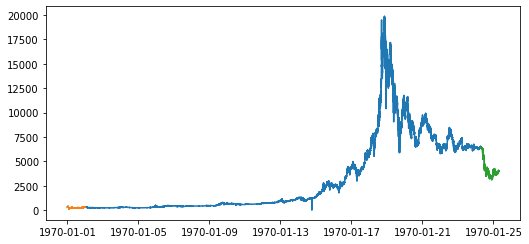

In [ ]:
# plot dataframe

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


# plot all the dataframe
plt.plot(pd.to_datetime(coinbaseUSD_df_time.index, unit='s'), coinbaseUSD_df_time.Close)

# plot first 24 hours
plt.plot(pd.to_datetime(coinbaseUSD_df_time.index, unit='s')[:60*60*24], coinbaseUSD_df_time.Close[:60*60*24])


# plot last 24 hours
plt.plot(pd.to_datetime(coinbaseUSD_df_time.index, unit='s')[len(coinbaseUSD_df_time.Close) - 60*60*24:], coinbaseUSD_df_time.Close[len(coinbaseUSD_df_time.Close) - 60*60*24:])

plt.show()

In the following few cells we will try to make our dataset composed of hourly data rows!

In [ ]:
print(pd.to_datetime(coinbaseUSD_df_time.index, unit='s').round('H')[(60)])
print(pd.to_datetime(coinbaseUSD_df_time.index, unit='s').round('H')[(60*2)])

print(pd.to_datetime(coinbaseUSD_df_time.index, unit='s').round('H')[(60*60)])
print(pd.to_datetime(coinbaseUSD_df_time.index, unit='s').round('H')[(60*60) + (60*60)])
print(pd.to_datetime(coinbaseUSD_df_time.index, unit='s').round('H')[(60*60*24)])

# cheking the count of the rows to get the first Hour of next day
print(pd.to_datetime(coinbaseUSD_df_time.index, unit='s').round('H')[(60*60*24) + (60*60)])



1970-01-01 00:00:00
1970-01-01 00:00:00
1970-01-01 01:00:00
1970-01-01 02:00:00
1970-01-02 00:00:00
1970-01-02 01:00:00


In [ ]:
coinbaseUSD_df_H = coinbaseUSD_df_time.copy()
coinbaseUSD_df_H['Timestamp'] = pd.to_datetime(coinbaseUSD_df_H.index, unit='s').round('H')
coinbaseUSD_df_H

,Timestamp,Close
0,1970-01-01 00:00:00,300.00
1,1970-01-01 00:00:00,300.00
2,1970-01-01 00:00:00,300.00
3,1970-01-01 00:00:00,300.00
4,1970-01-01 00:00:00,300.00
...,...,...
2099755,1970-01-25 07:00:00,4006.01
2099756,1970-01-25 07:00:00,4006.01
2099757,1970-01-25 07:00:00,4006.01
2099758,1970-01-25 07:00:00,4005.50


After making the round of the dataset according to the Timestamp colum it well be possible and easy to group the rows (in total 60*60 rows) of our dataframe and then to get the hourly data we apply the mean on the Close column.

In [ ]:
coinbaseUSD_df_Hours = coinbaseUSD_df_H.groupby(['Timestamp'])['Close'].mean()
df_H = pd.DataFrame({'Timestamp':coinbaseUSD_df_Hours.index, 'Close':coinbaseUSD_df_Hours.values})
print(df_H)

              Timestamp        Close
0   1970-01-01 00:00:00   369.455858
1   1970-01-01 01:00:00   345.778700
2   1970-01-01 02:00:00   192.364240
3   1970-01-01 03:00:00   203.405974
4   1970-01-01 04:00:00   223.318162
..                  ...          ...
579 1970-01-25 03:00:00  3744.843457
580 1970-01-25 04:00:00  3790.344899
581 1970-01-25 05:00:00  3780.856513
582 1970-01-25 06:00:00  3808.901480
583 1970-01-25 07:00:00  3947.130526

[584 rows x 2 columns]


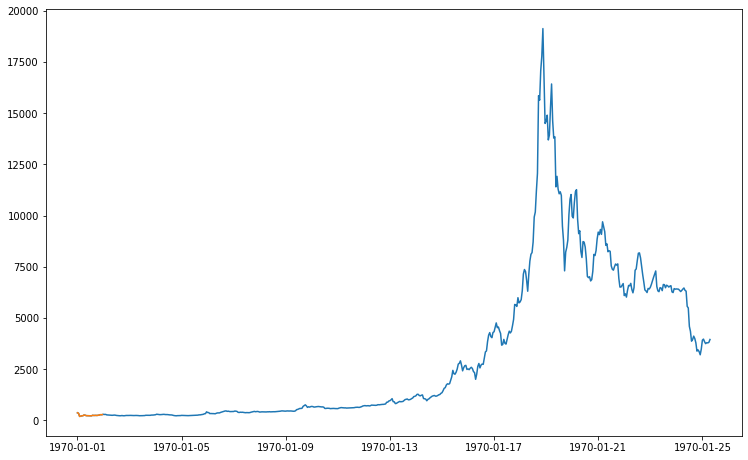

In [ ]:
# plot dataframe

plt.rcParams["figure.figsize"] = [10.50, 6.50]
plt.rcParams["figure.autolayout"] = True


# plot all dataframe of hourly data
plt.plot(df_H.Timestamp, df_H.Close)

# plot first 1 day
plt.plot(df_H.Timestamp[:24], df_H.Close[:24])

plt.show()

# Creating a Windowed Dataset

In [ ]:
df_H

,Timestamp,Close
0,1970-01-01 00:00:00,369.455858
1,1970-01-01 01:00:00,345.778700
2,1970-01-01 02:00:00,192.364240
3,1970-01-01 03:00:00,203.405974
4,1970-01-01 04:00:00,223.318162
...,...,...
579,1970-01-25 03:00:00,3744.843457
580,1970-01-25 04:00:00,3790.344899
581,1970-01-25 05:00:00,3780.856513
582,1970-01-25 06:00:00,3808.901480


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(df_H['Close'])
window_size_24H = 24
shuffle_buffer = 100
batch_size = 1
dataset = dataset.window(window_size_24H + 1, shift=24,drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(window_size_24H + 1))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))

dataset = dataset.shuffle(shuffle_buffer)
# If your program depends on the
# batches having the same outer dimension, you should set the drop_remainder
# argument to True to prevent the smaller batch from being produced.
dataset = dataset.batch(batch_size, drop_remainder=True)
print(dataset)

for feature, label in dataset.take(1):
  print(feature)
  print(label)

<BatchDataset element_spec=(TensorSpec(shape=(1, None), dtype=tf.float64, name=None), TensorSpec(shape=(1, None), dtype=tf.float64, name=None))>
tf.Tensor(
[[1350.23418495 1448.7139761  1564.62984449 1596.34408169 1725.35517079
  1783.42343151 1769.18222994 1787.2985107  1948.40768398 2125.19708252
  2439.81273535 2274.35087802 2253.09986948 2347.80390108 2502.31312136
  2745.40362879 2785.62223549 2905.43434843 2693.5260872  2416.93270631
  2570.52475423 2665.73396777 2684.13424049 2484.17491525]], shape=(1, 24), dtype=float64)
tf.Tensor([[2512.65056651]], shape=(1, 1), dtype=float64)


In [ ]:
features, labels = tuple(zip(*dataset))
features = np.array(features)
print(features.shape)
labels = np.array(labels)
print(labels.shape)

(24, 1, 24)
(24, 1, 1)


In [ ]:
# https://machinelearningmastery.com/machine-learning-data-transforms-for-time-series-forecasting/

from sklearn.preprocessing import MinMaxScaler
print(features[0])
# fit transform
transformer = MinMaxScaler()
transformer.fit(features[0])
# difference transform
transformed = transformer.transform(features[0])
print(transformed)
# invert difference
inverted = transformer.inverse_transform(transformed)
print(inverted)

[[ 9962.31316023  9881.76151709 10631.73556234 11166.56558211
  11261.50668425  9809.39178105  9113.08477367  9252.59084746
   8250.15369342  7950.27676577  8727.86755068  8699.57136705
   8462.29040822  7883.98403445  7028.8181283   6965.12214226
   7011.08819495  6806.13220895  6870.33510969  7271.96988608
   8099.19034157  8043.78427619  8287.03161899  8852.24338149]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 9962.31316023  9881.76151709 10631.73556234 11166.56558211
  11261.50668425  9809.39178105  9113.08477367  9252.59084746
   8250.15369342  7950.27676577  8727.86755068  8699.57136705
   8462.29040822  7883.98403445  7028.8181283   6965.12214226
   7011.08819495  6806.13220895  6870.33510969  7271.96988608
   8099.19034157  8043.78427619  8287.03161899  8852.24338149]]


In [ ]:
features_train = features[:20]
labels_train = labels[:20]

features_valid = features[20:]
labels_valid=labels[20:]

In [ ]:
print(features_train[0])
print(labels_train[0])

[[ 9962.31316023  9881.76151709 10631.73556234 11166.56558211
  11261.50668425  9809.39178105  9113.08477367  9252.59084746
   8250.15369342  7950.27676577  8727.86755068  8699.57136705
   8462.29040822  7883.98403445  7028.8181283   6965.12214226
   7011.08819495  6806.13220895  6870.33510969  7271.96988608
   8099.19034157  8043.78427619  8287.03161899  8852.24338149]]
[[9190.18102194]]


In [ ]:
# Normalization
# -------------
# The mean and standard deviation should only be calculated using the training
# data so that the models do not have access to the values in the validation and
# test sets.
# -------------
# train
# 1 features

features_train_mean = features_train.mean()
features_train_std = features_train.std()

features_train_N = (features_train - features_train_mean) / features_train_std

# 2 labels
labels_train_N = (labels_train - features_train_mean) / features_train_std


# valid
# 1 features
features_valid_N = (features_valid - features_train_mean) / features_train_std

# 2 labels
labels_valid_N = (labels_valid - features_train_mean) / features_train_std

In [ ]:
# Normalization with sklearn
# --------------------------
from sklearn.preprocessing import MinMaxScaler




# fit transform

## 1- features_train
transformer_features_train = MinMaxScaler()
transformer_features_train.fit(features_train)
transformed_features_train = transformer_features_train.transform(features_train)

## 2- labels_train
transformer_labels_train = MinMaxScaler()
transformer_labels_train.fit(labels_train)
transformed_labels_train = transformer_labels_train.transform(labels_train)

## 3- features_valid
transformer_features_valid = MinMaxScaler()
transformer_features_valid.fit(features_valid)
transformed_features_valid = transformer_features_valid.transform(features_valid)

## 4- labels_valid
transformer_labels_valid = MinMaxScaler()
transformer_labels_valid.fit(labels_valid)
transformed_labels_valid = transformer_labels_valid.transform(labels_valid)


ValueError: ignored

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.LSTM(64, return_sequences=False),
                                    tf.keras.layers.Dense(units=1)
                                    ])

In [ ]:
# mean-squared error (MSE) as its cost function
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
    )

In [ ]:
model.fit(x=transformed_features_train,
          y=transformed_labels_train,
          batch_size=4,
          epochs=180, verbose=1,
          validation_data=(transformed_features_valid, transformed_labels_valid))

Epoch 1/180
5/5 [==============================] - 3s 121ms/step - loss: 0.7017 - val_loss: 0.6341
Epoch 2/180
5/5 [==============================] - 0s 8ms/step - loss: 0.7016 - val_loss: 0.6339
Epoch 3/180
5/5 [==============================] - 0s 11ms/step - loss: 0.7014 - val_loss: 0.6337
Epoch 4/180
5/5 [==============================] - 0s 8ms/step - loss: 0.7012 - val_loss: 0.6335
Epoch 5/180
5/5 [==============================] - 0s 7ms/step - loss: 0.7010 - val_loss: 0.6332
Epoch 6/180
5/5 [==============================] - 0s 8ms/step - loss: 0.7007 - val_loss: 0.6330
Epoch 7/180
5/5 [==============================] - 0s 8ms/step - loss: 0.7005 - val_loss: 0.6327
Epoch 8/180
5/5 [==============================] - 0s 8ms/step - loss: 0.7002 - val_loss: 0.6324
Epoch 9/180
5/5 [==============================] - 0s 8ms/step - loss: 0.6999 - val_loss: 0.6322
Epoch 10/180
5/5 [==============================] - 0s 7ms/step - loss: 0.6996 - val_loss: 0.6319
Epoch 11/180
5/5 [========

In [ ]:
print(features_train[1])
print(labels_train[1])

[[572.35983893 596.62102806 610.13334907 622.94631286 616.12631214
  608.72350931 607.32911413 609.46280634 599.58990558 601.93565435
  604.40990003 605.32810225 612.01463205 611.69987219 613.6742877
  618.51482356 632.03596501 637.27574326 640.40815884 633.91936927
  633.47933074 651.08846068 669.95495696 700.42664073]]
[[709.77942238]]


A normalized data prediction!

In [ ]:
result_N = model.predict(features_train[1][np.newaxis])
result_N

array([[0.58138424]], dtype=float32)